In order to know a person's preference to give samples it's enough if i know what item_name they like. Based on that I will cluster.

If i need to know which customer contributes to more revenue then i should see area,quantity,etc.

Or item_name,QualityName,DesignName,ColorName could also be combinedly used.
ShapeName is rectangle everywhere so ignored.

So find the count(item_name) a person has bought so far. Based on that i can cluster (give to kmeans algo)

Or count(item_name,QualityName,DesignName,ColorName) a person has bought so far. Based on that i can cluster (give to kmeans algo)

Customer id is unique -> 44 customers -> so i will group those 44 customers into clusters.
x axis=customerid
y axis=cluster

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_excel("/content/data order.xlsx")

In [ ]:
data.head(5)

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.00,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.00,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.00,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.00,10.5300


In [ ]:
one_hot_encoded = pd.get_dummies(data['ITEM_NAME'])
df_encoded = pd.concat([data['CustomerCode'], one_hot_encoded], axis=1)
averaged_data = df_encoded.groupby('CustomerCode').sum()
averaged_data.reset_index(inplace=True)
averaged_data.columns.values

array(['CustomerCode', '-', 'DOUBLE BACK', 'DURRY', 'GUN TUFTED',
       'HAND TUFTED', 'HANDLOOM', 'HANDWOVEN', 'INDO-TIBBETAN',
       'JACQUARD', 'KNOTTED', 'POWER LOOM JACQUARD', 'TABLE TUFTED'],
      dtype=object)

In [ ]:
averaged_data

,CustomerCode,-,DOUBLE BACK,DURRY,GUN TUFTED,HAND TUFTED,HANDLOOM,HANDWOVEN,INDO-TIBBETAN,JACQUARD,KNOTTED,POWER LOOM JACQUARD,TABLE TUFTED
0,A-11,0,0,8,0,0,32,0,0,0,0,0,0
1,A-6,0,5,0,0,0,0,0,0,20,0,0,0
2,A-9,0,36,223,0,626,0,163,0,56,69,0,0
3,B-2,0,0,33,0,0,0,12,0,2,0,0,0
4,B-3,0,67,0,0,0,0,0,0,5,0,0,0
5,B-4,0,0,3,0,60,12,0,0,0,0,0,0
6,C-1,0,0,26,0,875,0,75,0,0,82,0,0
7,C-2,0,0,141,0,26,0,65,0,0,0,0,0
8,C-3,0,0,68,0,19,0,0,0,0,0,0,0
9,CC,0,3,3,17,169,2,0,0,0,0,0,0


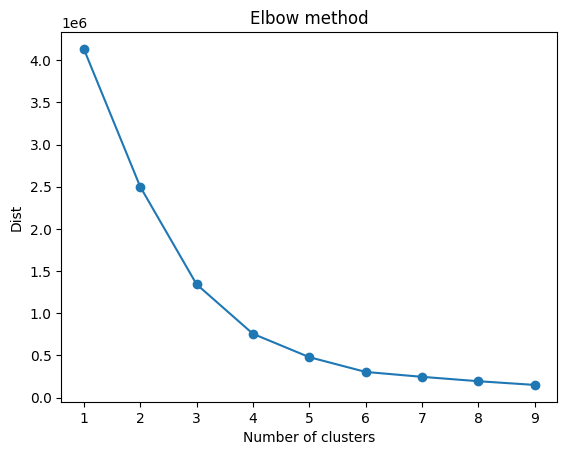

In [ ]:
columns=["-","DOUBLE BACK","DURRY","GUN TUFTED","HAND TUFTED","HANDLOOM","HANDWOVEN","INDO-TIBBETAN","JACQUARD","KNOTTED","POWER LOOM JACQUARD","TABLE TUFTED"]
processed_data=averaged_data[columns]
dist = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(processed_data)
    dist.append(kmeans.inertia_)

plt.plot(range(1,10), dist, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Dist')
plt.show()

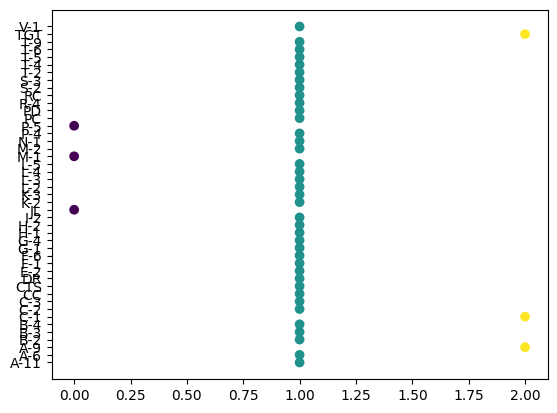

In [ ]:
columns=["-","DOUBLE BACK","DURRY","GUN TUFTED","HAND TUFTED","HANDLOOM","HANDWOVEN","INDO-TIBBETAN","JACQUARD","KNOTTED","POWER LOOM JACQUARD","TABLE TUFTED"]
processed_data=averaged_data[columns]


kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(processed_data)
averaged_data['Cluster']=kmeans.labels_
plt.scatter(averaged_data['Cluster'],averaged_data["CustomerCode"],c=averaged_data['Cluster'],cmap='viridis')
plt.show()


In [ ]:
print(averaged_data[averaged_data['Cluster']==1])

   CustomerCode  -  DOUBLE BACK  DURRY  GUN TUFTED  HAND TUFTED  HANDLOOM  \
0          A-11  0            0      8           0            0        32   
1           A-6  0            5      0           0            0         0   
3           B-2  0            0     33           0            0         0   
4           B-3  0           67      0           0            0         0   
5           B-4  0            0      3           0           60        12   
7           C-2  0            0    141           0           26         0   
8           C-3  0            0     68           0           19         0   
9            CC  0            3      3          17          169         2   
10          CTS  0            0      0           0            8         0   
11           DR  0           16      0           0            3         0   
12          E-2  0          157      6           0            0         0   
13          F-1  0            6     22           0           14         0   

In [ ]:
print(averaged_data[averaged_data['Cluster']==2])

   CustomerCode  -  DOUBLE BACK  DURRY  GUN TUFTED  HAND TUFTED  HANDLOOM  \
2           A-9  0           36    223           0          626         0   
6           C-1  0            0     26           0          875         0   
43          TGT  0            0      0           0          609         0   

    HANDWOVEN  INDO-TIBBETAN  JACQUARD  KNOTTED  POWER LOOM JACQUARD  \
2         163              0        56       69                    0   
6          75              0         0       82                    0   
43          0              0         0        0                    0   

    TABLE TUFTED  Cluster  
2              0        2  
6              0        2  
43             0        2  


In [ ]:
print(averaged_data[averaged_data['Cluster']==0])

   CustomerCode  -  DOUBLE BACK  DURRY  GUN TUFTED  HAND TUFTED  HANDLOOM  \
20           JL  2          294    311           0          141         0   
27          M-1  1          904    118          16          230        81   
31          P-5  0          163    876           0           86        15   

    HANDWOVEN  INDO-TIBBETAN  JACQUARD  KNOTTED  POWER LOOM JACQUARD  \
20        240              0        21       64                    0   
27        479              0        19      532                    0   
31        239              0        25      458                    0   

    TABLE TUFTED  Cluster  
20             0        0  
27             0        0  
31             0        0  


In [ ]:
#Mean Values of Features within Each Cluster
#this is the characteristic of every cluster.Will send each cluster sample based on this.
cluster_means = averaged_data.groupby('Cluster').mean()
print("\nMean Values of Features within Each Cluster:")
print(cluster_means)


Mean Values of Features within Each Cluster:
                -  DOUBLE BACK      DURRY  GUN TUFTED  HAND TUFTED   HANDLOOM  \
Cluster                                                                         
0        1.000000   453.666667  435.00000    5.333333   152.333333  32.000000   
1        0.025641    13.410256   31.74359    0.974359    53.923077   4.051282   
2        0.000000    12.000000   83.00000    0.000000   703.333333   0.000000   

          HANDWOVEN  INDO-TIBBETAN   JACQUARD     KNOTTED  \
Cluster                                                     
0        319.333333       0.000000  21.666667  351.333333   
1         11.000000       0.205128   6.974359    3.923077   
2         79.333333       0.000000  18.666667   50.333333   

         POWER LOOM JACQUARD  TABLE TUFTED  
Cluster                                     
0                   0.000000      0.000000  
1                   1.153846      0.307692  
2                   0.000000      0.000000  


<ipython-input-49-3b0ef67e99bb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = averaged_data.groupby('Cluster').mean()
